Delta = 990.0


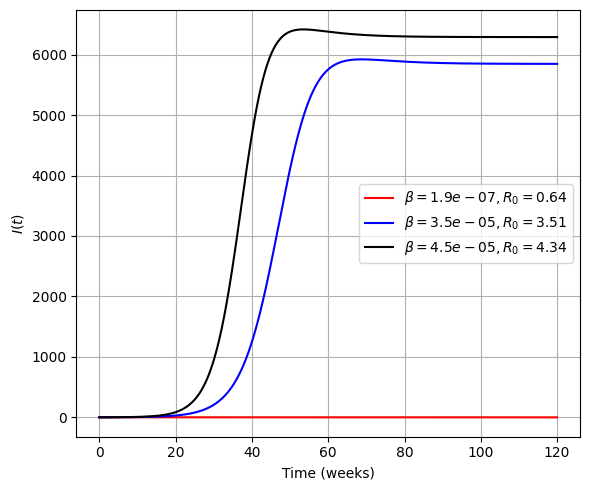

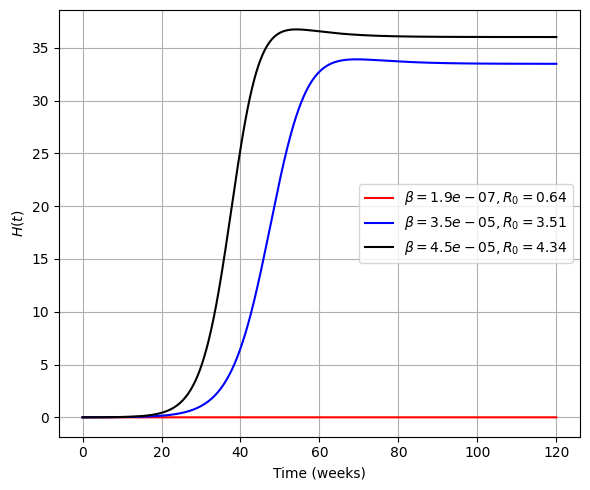

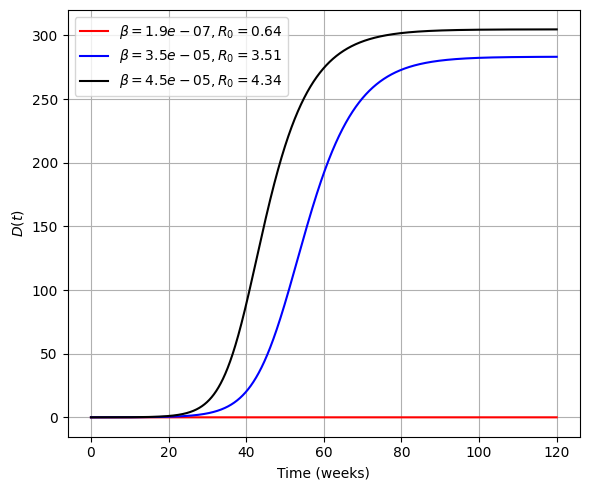

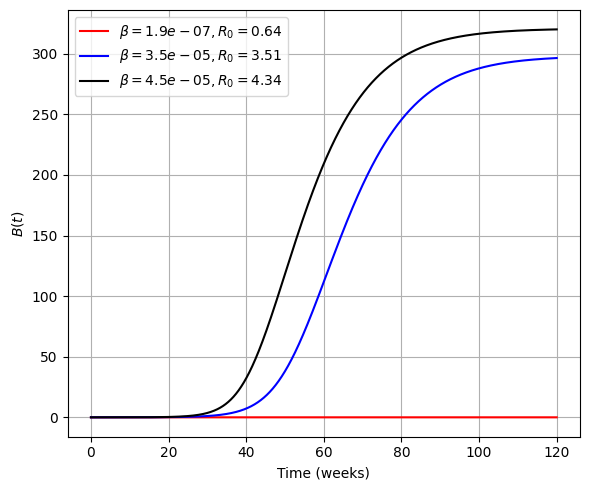

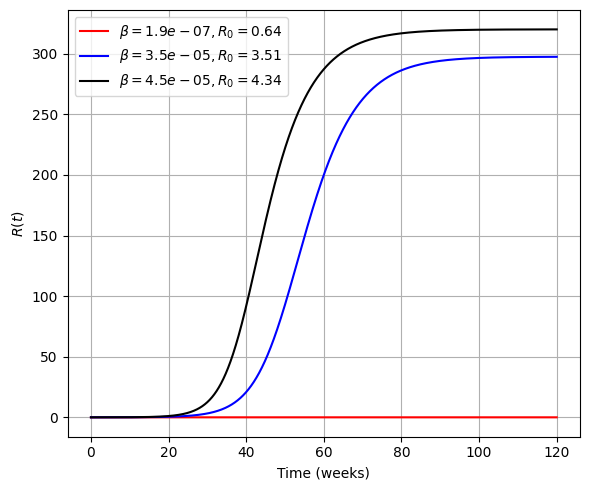

In [ ]:
import numpy as np
from scipy.integrate import odeint
from scipy.linalg import eig
import matplotlib.pyplot as plt
import pandas as pd



#generate a subfolder for the plots
#import os
#os.makedirs('Fig_beta')

# Population
#N = 47060.97
N = 10000
Tend = 120

# Initial guess parameters
guess_params = np.zeros(17)
guess_params[0] = 0.93      # Increase delta to speed up progression to I
guess_params[1]  = 0.000000190     # beta
guess_params[2]  = 0.0000000245     # beta_1
guess_params[3]  = 0.000000065      # beta_2
guess_params[4]  = 0.0000000650     # beta_3
guess_params[5] =  0.000620       # beta_p
guess_params[6] =  0.00055          # gamma
guess_params[7]  = 0.00990          # gamma_1    # very sensitive
guess_params[8]  = 0.006          # sigma
guess_params[10] = 0.000010      # d_1
guess_params[11] = 0.750        # eta
guess_params[12] = 0.88000      # xi
guess_params[13] = 0.1000       # d change sensitive
guess_params[15] = 0.010        # eta_1
guess_params[16] = 0.50000      # alpha
guess_params[9] = 0.65 * guess_params[10]      # b_1 = 0.9*d_1
guess_params[14] = 0.95 * guess_params[13]      # b = 1.1*d



delta = guess_params[0]
gamma = guess_params[6]
gamma_1 = guess_params[7]
eta   = guess_params[11]
xi    = guess_params[12]


#lexp = 65.25
#lexp = 60.1
#mu = 1./(52*lexp)/100
#mu = 0.0000045
mu = 0.099
Delta = N * mu
a1 = delta + mu
a2 = gamma + gamma_1 + mu
a3 = eta + xi + mu
phi_p = 0.00

print('Delta =', Delta)

# Define the system of differential equations
def ebola_model(y, t, params):
    S, E, I, H, R, D, B, P = y

    # 0      1     2       3       4       5       6       7        8    9   10   11   12  13 14  15     16
    delta, beta, beta_1, beta_2, beta_3, beta_p, gamma, gamma_1, sigma, b_1, d_1, eta, xi, d, b, eta_1, alpha = params

    Psi = beta * I + beta_1 * H + beta_2 * D + beta_3 * B + beta_p * P
    dSdt =  Delta - (Psi + mu) * S
    dEdt = Psi * S - a1 * E
    dIdt = delta * E - a2 * I
    dHdt = gamma_1 * I - a3 * H
    dRdt = xi * H -  mu * R
    dDdt = gamma * I + eta * H - d * D
    dBdt = d * D - b * B
    dPdt = phi_p + sigma * I + eta_1 * H + d_1 * D + b_1 * B - alpha * P

    return [dSdt, dEdt, dIdt, dHdt, dRdt, dDdt, dBdt, dPdt]

# Function to calculate R0
def ebola_R0(params):
    delta, beta, beta_1, beta_2, beta_3, beta_p, gamma, gamma_1, sigma, b_1, d_1, eta, xi, d, b, eta_1, alpha = params

    a1 = delta + mu
    a2 = gamma + gamma_1 + mu
    a3 = eta + xi + mu

    R0 = ( beta + beta_2 * gamma / d + beta_3 * gamma / b + beta_p * sigma / alpha + beta_p * gamma / alpha * (d_1 / d + b_1 / b) ) * Delta * delta / (mu * a1 * a2) + \
         ( beta_1 + beta_2 * eta / d + beta_3 * eta / b + beta_p * eta_1 / alpha + beta_p * eta / alpha * (d_1 / d + b_1 / b) ) * Delta * delta * gamma_1 / (mu * a1 * a2 * a3)

    return R0

# Simulation parameters
betas = [ 0.000000190, 0.000035, 0.000045]
styles = ['r-', 'b-', 'k-']
tt = np.linspace(0., Tend, 35001)

# Initial conditions
S0 = 0.9999 * N
E0 = N - S0
I0 = 0.
y0 = np.array([S0, E0, I0, 0.0000 * N, 0.0000 * N, 0.00000 * N, 0.00000 * N, 0.])


# plot: I
plt.figure(figsize=(6, 5))
for beta, style in zip(betas, styles):
    guess_params[1] = beta
    R0 = ebola_R0(guess_params)
    sol = odeint(ebola_model, y0, tt, args=(guess_params,))
    plt.plot(tt, sol[:, 2], style, label=f'$\\beta={beta}, R_0={R0:.2f}$')
plt.xlabel('Time (weeks)')
plt.ylabel('$I(t)$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('Fig_beta/I.pdf',bbox_inches='tight')
plt.show()



# plot: H
plt.figure(figsize=(6, 5))
for beta, style in zip(betas, styles):
    guess_params[1] = beta
    R0 = ebola_R0(guess_params)
    sol = odeint(ebola_model, y0, tt, args=(guess_params,))
    plt.plot(tt, sol[:, 3], style, label=f'$\\beta={beta}, R_0={R0:.2f}$')
plt.xlabel('Time (weeks)')
plt.ylabel('$H(t)$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('Fig_beta/H.pdf',bbox_inches='tight')
plt.show()



# plot: D
plt.figure(figsize=(6, 5))
for beta, style in zip(betas, styles):
    guess_params[1] = beta
    R0 = ebola_R0(guess_params)
    sol = odeint(ebola_model, y0, tt, args=(guess_params,))
    plt.plot(tt, sol[:, 5], style, label=f'$\\beta={beta}, R_0={R0:.2f}$')
plt.xlabel('Time (weeks)')
plt.ylabel('$D(t)$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('Fig_beta/D.pdf',bbox_inches='tight')
plt.show()

plt.show()


# plot: B
plt.figure(figsize=(6, 5))
for beta, style in zip(betas, styles):
    guess_params[1] = beta
    R0 = ebola_R0(guess_params)
    sol = odeint(ebola_model, y0, tt, args=(guess_params,))
    plt.plot(tt, sol[:, 6], style, label=f'$\\beta={beta}, R_0={R0:.2f}$')
plt.xlabel('Time (weeks)')
plt.ylabel('$B(t)$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('Fig_beta/B.pdf',bbox_inches='tight')
plt.show()


# plot: B
plt.figure(figsize=(6, 5))
for beta, style in zip(betas, styles):
    guess_params[1] = beta
    R0 = ebola_R0(guess_params)
    sol = odeint(ebola_model, y0, tt, args=(guess_params,))
    plt.plot(tt, sol[:, 4], style, label=f'$\\beta={beta}, R_0={R0:.2f}$')
plt.xlabel('Time (weeks)')
plt.ylabel('$R(t)$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('Fig_beta/R.pdf',bbox_inches='tight')
plt.show()

Delta = 990.0


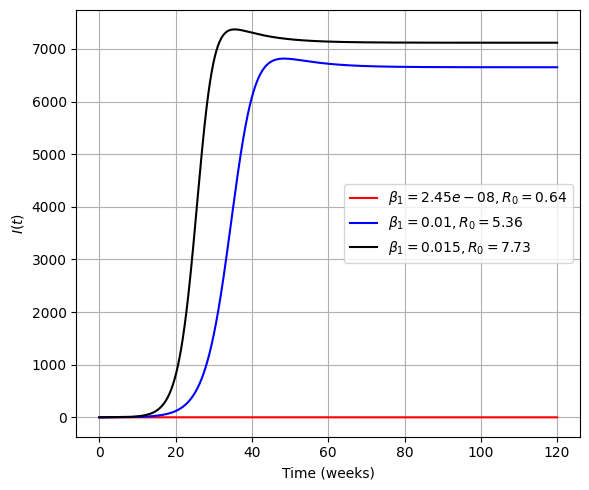

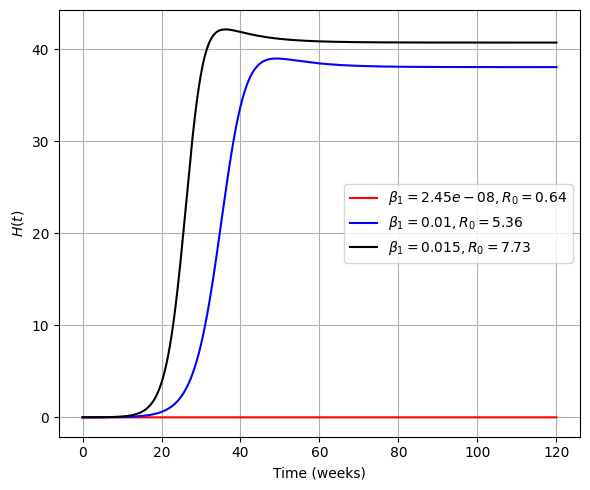

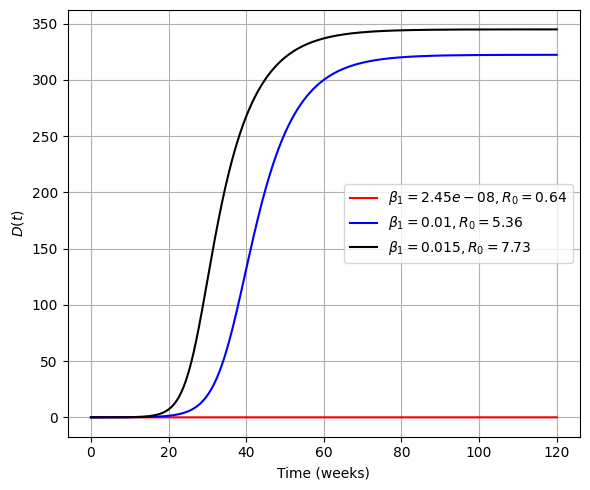

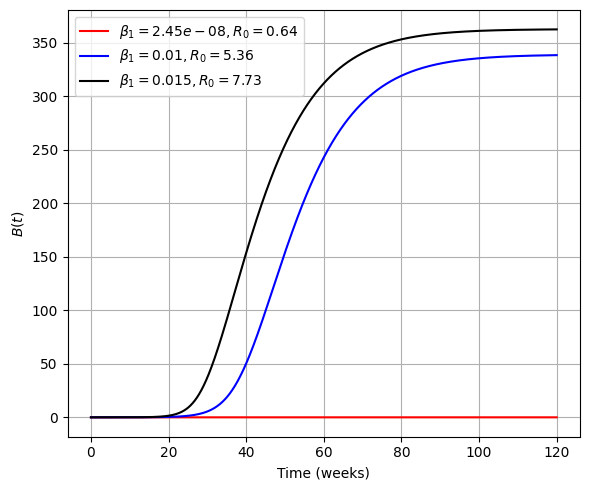

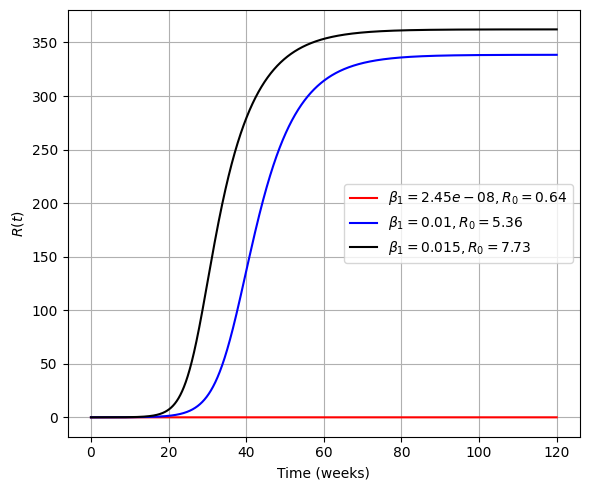

In [49]:
# beta1

import numpy as np
from scipy.integrate import odeint
from scipy.linalg import eig
import matplotlib.pyplot as plt
import pandas as pd



#generate a subfolder for the plots
#import os
#os.makedirs('Fig_beta1')



# Population
#N = 47060.97
N = 10000
Tend = 120

# Initial guess parameters
guess_params = np.zeros(17)
guess_params[0] = 0.93      # Increase delta to speed up progression to I
guess_params[1]  = 0.000000190     # beta
guess_params[2]  = 0.0000000245     # beta_1
guess_params[3]  = 0.000000065      # beta_2
guess_params[4]  = 0.0000000650     # beta_3
guess_params[5] =  0.000620       # beta_p
guess_params[6] =  0.00055          # gamma
guess_params[7]  = 0.00990          # gamma_1    # very sensitive
guess_params[8]  = 0.006          # sigma
guess_params[10] = 0.000010      # d_1
guess_params[11] = 0.750        # eta
guess_params[12] = 0.88000      # xi
guess_params[13] = 0.1000       # d change sensitive
guess_params[15] = 0.010        # eta_1
guess_params[16] = 0.50000      # alpha
guess_params[9] = 0.65 * guess_params[10]      # b_1 = 0.9*d_1
guess_params[14] = 0.95 * guess_params[13]      # b = 1.1*d



delta = guess_params[0]
gamma = guess_params[6]
gamma_1 = guess_params[7]
eta   = guess_params[11]
xi    = guess_params[12]


#lexp = 65.25
#lexp = 60.1
#mu = 1./(52*lexp)/100
#mu = 0.0000045
mu = 0.099
Delta = N * mu
a1 = delta + mu
a2 = gamma + gamma_1 + mu
a3 = eta + xi + mu
phi_p = 0.00

print('Delta =', Delta)

# Define the system of differential equations
def ebola_model(y, t, params):
    S, E, I, H, R, D, B, P = y

    # 0      1     2       3       4       5       6       7        8    9   10   11   12  13 14  15     16
    delta, beta, beta_1, beta_2, beta_3, beta_p, gamma, gamma_1, sigma, b_1, d_1, eta, xi, d, b, eta_1, alpha = params

    Psi = beta * I + beta_1 * H + beta_2 * D + beta_3 * B + beta_p * P
    dSdt =  Delta - (Psi + mu) * S
    dEdt = Psi * S - a1 * E
    dIdt = delta * E - a2 * I
    dHdt = gamma_1 * I - a3 * H
    dRdt = xi * H -  mu * R
    dDdt = gamma * I + eta * H - d * D
    dBdt = d * D - b * B
    dPdt = phi_p + sigma * I + eta_1 * H + d_1 * D + b_1 * B - alpha * P

    return [dSdt, dEdt, dIdt, dHdt, dRdt, dDdt, dBdt, dPdt]

# Function to calculate R0
def ebola_R0(params):
    delta, beta, beta_1, beta_2, beta_3, beta_p, gamma, gamma_1, sigma, b_1, d_1, eta, xi, d, b, eta_1, alpha = params

    a1 = delta + mu
    a2 = gamma + gamma_1 + mu
    a3 = eta + xi + mu

    R0 = ( beta + beta_2 * gamma / d + beta_3 * gamma / b + beta_p * sigma / alpha + beta_p * gamma / alpha * (d_1 / d + b_1 / b) ) * Delta * delta / (mu * a1 * a2) + \
         ( beta_1 + beta_2 * eta / d + beta_3 * eta / b + beta_p * eta_1 / alpha + beta_p * eta / alpha * (d_1 / d + b_1 / b) ) * Delta * delta * gamma_1 / (mu * a1 * a2 * a3)

    return R0

# Simulation parameters
beta1s = [0.0000000245, 0.010, 0.015]
styles = ['r-', 'b-', 'k-']
tt = np.linspace(0., Tend, 35001)

# Initial conditions
S0 = 0.9999 * N
E0 = N - S0
I0 = 0.
y0 = np.array([S0, E0, I0, 0.0000 * N, 0.0000 * N, 0.00000 * N, 0.00000 * N, 0.])


# plot: I
plt.figure(figsize=(6, 5))
for beta_1, style in zip(beta1s, styles):
    guess_params[2] = beta_1
    R0 = ebola_R0(guess_params)
    sol = odeint(ebola_model, y0, tt, args=(guess_params,))
    plt.plot(tt, sol[:, 2], style, label=f'$\\beta_1={beta_1}, R_0={R0:.2f}$')
plt.xlabel('Time (weeks)')
plt.ylabel('$I(t)$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('Fig_beta1/I.pdf',bbox_inches='tight')
plt.show()



# plot: H
plt.figure(figsize=(6, 5))
for beta_1, style in zip(beta1s, styles):
    guess_params[2] = beta_1
    R0 = ebola_R0(guess_params)
    sol = odeint(ebola_model, y0, tt, args=(guess_params,))
    plt.plot(tt, sol[:, 3], style, label=f'$\\beta_1={beta_1}, R_0={R0:.2f}$')
plt.xlabel('Time (weeks)')
plt.ylabel('$H(t)$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('Fig_beta1/H.pdf',bbox_inches='tight')
plt.show()



# plot: D
plt.figure(figsize=(6, 5))
for beta_1, style in zip(beta1s, styles):
    guess_params[2] = beta_1
    R0 = ebola_R0(guess_params)
    sol = odeint(ebola_model, y0, tt, args=(guess_params,))
    plt.plot(tt, sol[:, 5], style, label=f'$\\beta_1={beta_1}, R_0={R0:.2f}$')
plt.xlabel('Time (weeks)')
plt.ylabel('$D(t)$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('Fig_beta1/D.pdf',bbox_inches='tight')
plt.show()

# plot: B
plt.figure(figsize=(6, 5))
for beta_1, style in zip(beta1s, styles):
    guess_params[2] = beta_1
    R0 = ebola_R0(guess_params)
    sol = odeint(ebola_model, y0, tt, args=(guess_params,))
    plt.plot(tt, sol[:, 6], style, label=f'$\\beta_1={beta_1}, R_0={R0:.2f}$')
plt.xlabel('Time (weeks)')
plt.ylabel('$B(t)$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('Fig_beta1/B.pdf',bbox_inches='tight')
plt.show()


# plot: R
plt.figure(figsize=(6, 5))
for beta_1, style in zip(beta1s, styles):
    guess_params[2] = beta_1
    R0 = ebola_R0(guess_params)
    sol = odeint(ebola_model, y0, tt, args=(guess_params,))
    plt.plot(tt, sol[:, 4], style, label=f'$\\beta_1={beta_1}, R_0={R0:.2f}$')
plt.xlabel('Time (weeks)')
plt.ylabel('$R(t)$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('Fig_beta1/R.pdf',bbox_inches='tight')
plt.show()

Delta = 990.0


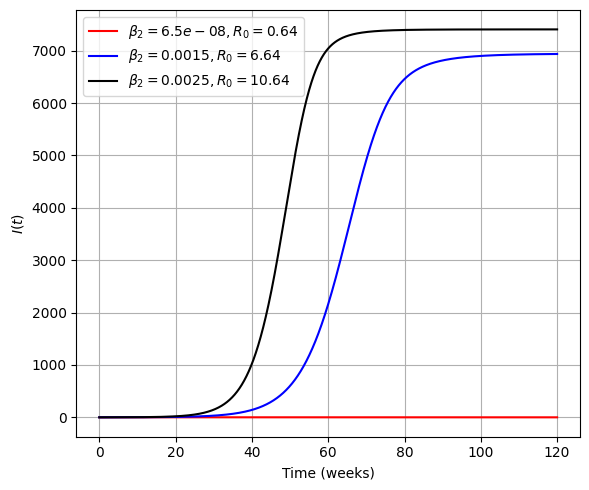

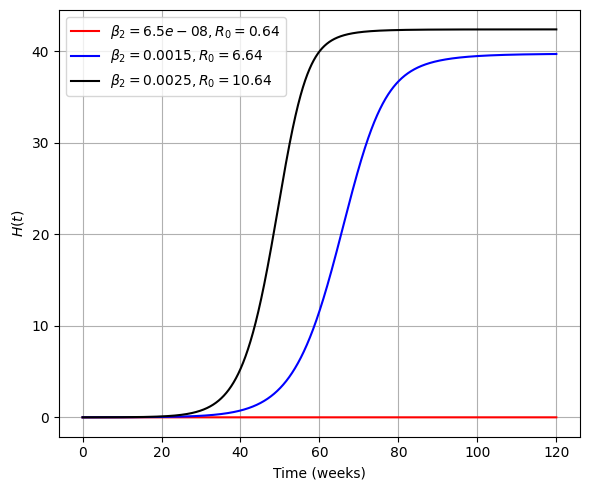

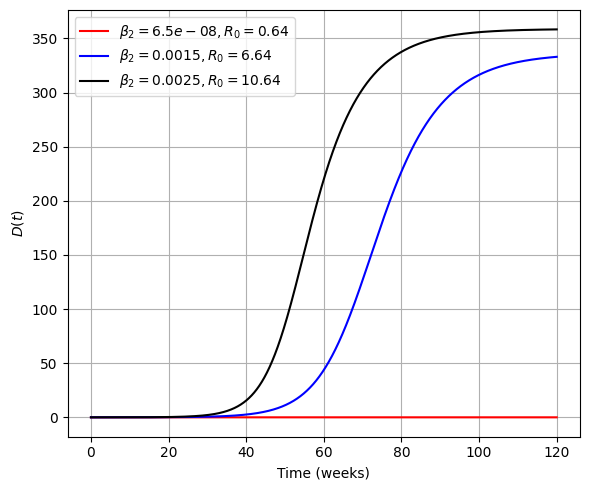

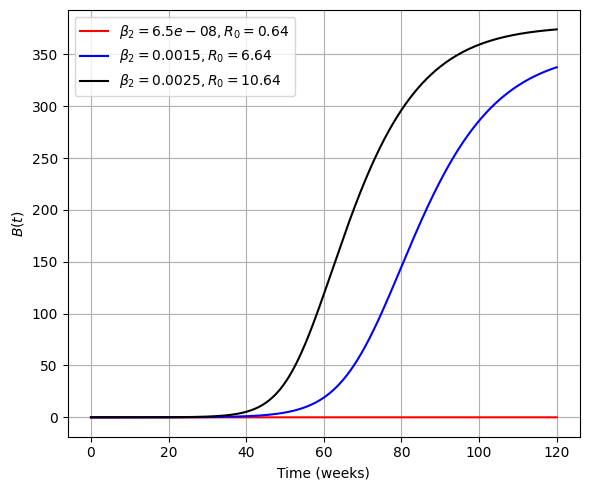

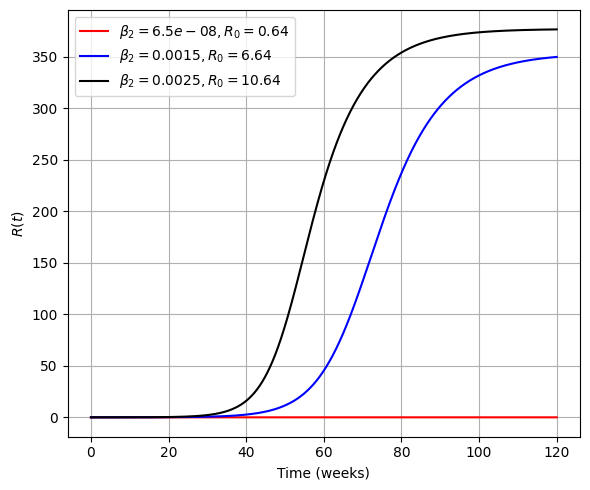

In [64]:
## beta2


import numpy as np
from scipy.integrate import odeint
from scipy.linalg import eig
import matplotlib.pyplot as plt
import pandas as pd

#generate a subfolder for the plots
#import os
#os.makedirs('Fig_beta2')

# Population
#N = 47060.97
N = 10000
Tend = 120

# Initial guess parameters
guess_params = np.zeros(17)
guess_params[0] = 0.93      # Increase delta to speed up progression to I
guess_params[1]  = 0.000000190     # beta
guess_params[2]  = 0.0000000245     # beta_1
guess_params[3]  = 0.000000065      # beta_2
guess_params[4]  = 0.0000000650     # beta_3
guess_params[5] =  0.000620       # beta_p
guess_params[6] =  0.00055          # gamma
guess_params[7]  = 0.00990          # gamma_1    # very sensitive
guess_params[8]  = 0.006          # sigma
guess_params[10] = 0.000010      # d_1
guess_params[11] = 0.750        # eta
guess_params[12] = 0.88000      # xi
guess_params[13] = 0.1000       # d change sensitive
guess_params[15] = 0.010        # eta_1
guess_params[16] = 0.50000      # alpha
guess_params[9] = 0.65 * guess_params[10]      # b_1 = 0.9*d_1
guess_params[14] = 0.95 * guess_params[13]      # b = 1.1*d

delta = guess_params[0]
gamma = guess_params[6]
gamma_1 = guess_params[7]
eta   = guess_params[11]
xi    = guess_params[12]


#lexp = 65.25
#lexp = 60.1
#mu = 1./(52*lexp)/100
#mu = 0.0000045
mu = 0.099
Delta = N * mu
a1 = delta + mu
a2 = gamma + gamma_1 + mu
a3 = eta + xi + mu
phi_p = 0.00

print('Delta =', Delta)

# Define the system of differential equations
def ebola_model(y, t, params):
    S, E, I, H, R, D, B, P = y

    # 0      1     2       3       4       5       6       7        8    9   10   11   12  13 14  15     16
    delta, beta, beta_1, beta_2, beta_3, beta_p, gamma, gamma_1, sigma, b_1, d_1, eta, xi, d, b, eta_1, alpha = params

    Psi = beta * I + beta_1 * H + beta_2 * D + beta_3 * B + beta_p * P
    dSdt =  Delta - (Psi + mu) * S
    dEdt = Psi * S - a1 * E
    dIdt = delta * E - a2 * I
    dHdt = gamma_1 * I - a3 * H
    dRdt = xi * H -  mu * R
    dDdt = gamma * I + eta * H - d * D
    dBdt = d * D - b * B
    dPdt = phi_p + sigma * I + eta_1 * H + d_1 * D + b_1 * B - alpha * P

    return [dSdt, dEdt, dIdt, dHdt, dRdt, dDdt, dBdt, dPdt]

# Function to calculate R0
def ebola_R0(params):
    delta, beta, beta_1, beta_2, beta_3, beta_p, gamma, gamma_1, sigma, b_1, d_1, eta, xi, d, b, eta_1, alpha = params

    a1 = delta + mu
    a2 = gamma + gamma_1 + mu
    a3 = eta + xi + mu

    R0 = ( beta + beta_2 * gamma / d + beta_3 * gamma / b + beta_p * sigma / alpha + beta_p * gamma / alpha * (d_1 / d + b_1 / b) ) * Delta * delta / (mu * a1 * a2) + \
         ( beta_1 + beta_2 * eta / d + beta_3 * eta / b + beta_p * eta_1 / alpha + beta_p * eta / alpha * (d_1 / d + b_1 / b) ) * Delta * delta * gamma_1 / (mu * a1 * a2 * a3)

    return R0

# Simulation parameters
beta2s = [0.000000065 , 0.0015 , 0.0025 ]
styles = ['r-', 'b-', 'k-']
tt = np.linspace(0., Tend, 35001)

# Initial conditions
S0 = 0.9999 * N
E0 = N - S0
I0 = 0.
y0 = np.array([S0, E0, I0, 0.0000 * N, 0.0000 * N, 0.00000 * N, 0.00000 * N, 0.])


# plot: I
plt.figure(figsize=(6, 5))
for beta_2, style in zip(beta2s, styles):
    guess_params[3] = beta_2
    R0 = ebola_R0(guess_params)
    sol = odeint(ebola_model, y0, tt, args=(guess_params,))
    plt.plot(tt, sol[:, 2], style, label=f'$\\beta_2={beta_2}, R_0={R0:.2f}$')
plt.xlabel('Time (weeks)')
plt.ylabel('$I(t)$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('Fig_beta2/I.pdf',bbox_inches='tight')
plt.show()



# plot: H
plt.figure(figsize=(6, 5))
for beta_2, style in zip(beta2s, styles):
    guess_params[3] = beta_2
    R0 = ebola_R0(guess_params)
    sol = odeint(ebola_model, y0, tt, args=(guess_params,))
    plt.plot(tt, sol[:, 3], style, label=f'$\\beta_2={beta_2}, R_0={R0:.2f}$')
plt.xlabel('Time (weeks)')
plt.ylabel('$H(t)$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('Fig_beta2/H.pdf',bbox_inches='tight')
plt.show()



# plot: D
plt.figure(figsize=(6, 5))
for beta_2, style in zip(beta2s, styles):
    guess_params[3] = beta_2
    R0 = ebola_R0(guess_params)
    sol = odeint(ebola_model, y0, tt, args=(guess_params,))
    plt.plot(tt, sol[:, 5], style, label=f'$\\beta_2={beta_2}, R_0={R0:.2f}$')
plt.xlabel('Time (weeks)')
plt.ylabel('$D(t)$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('Fig_beta2/D.pdf',bbox_inches='tight')
plt.show()

# plot: B
plt.figure(figsize=(6, 5))
for beta_2, style in zip(beta2s, styles):
    guess_params[3] = beta_2
    R0 = ebola_R0(guess_params)
    sol = odeint(ebola_model, y0, tt, args=(guess_params,))
    plt.plot(tt, sol[:, 6], style, label=f'$\\beta_2={beta_2}, R_0={R0:.2f}$')
plt.xlabel('Time (weeks)')
plt.ylabel('$B(t)$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('Fig_beta2/B.pdf',bbox_inches='tight')
plt.show()


# plot: R
plt.figure(figsize=(6, 5))
for beta_2, style in zip(beta2s, styles):
    guess_params[3] = beta_2
    R0 = ebola_R0(guess_params)
    sol = odeint(ebola_model, y0, tt, args=(guess_params,))
    plt.plot(tt, sol[:, 4], style, label=f'$\\beta_2={beta_2}, R_0={R0:.2f}$')
plt.xlabel('Time (weeks)')
plt.ylabel('$R(t)$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('Fig_beta2/R.pdf',bbox_inches='tight')
plt.show()

Delta = 990.0


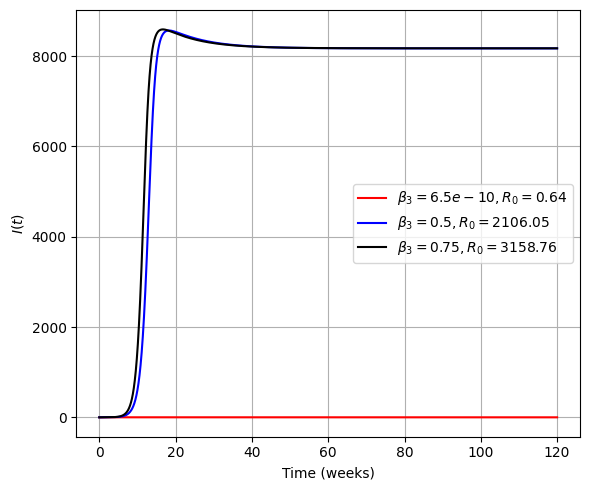

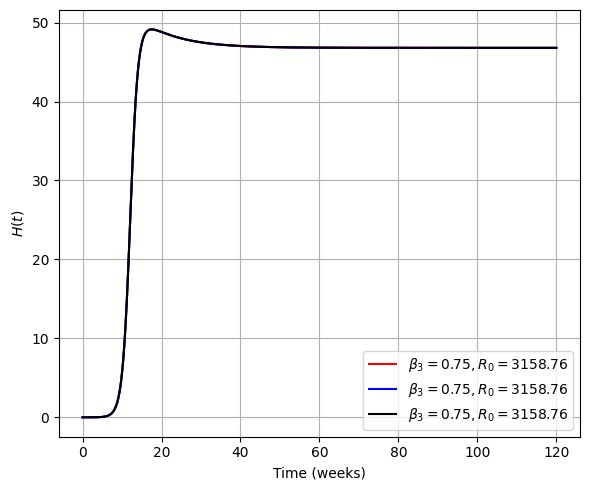

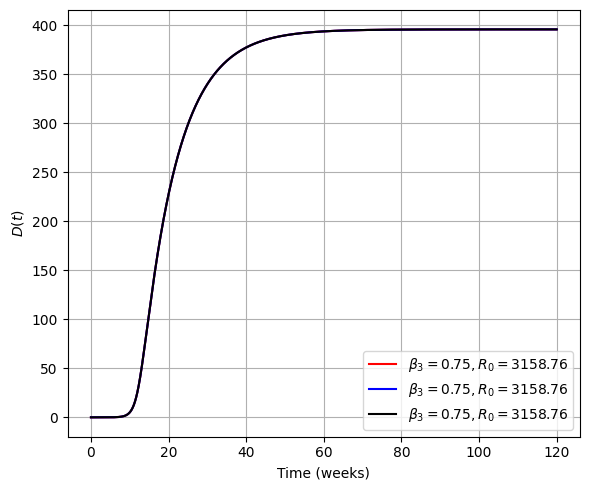

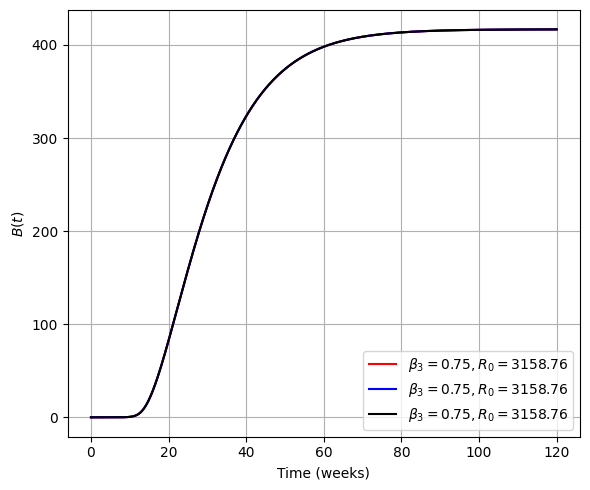

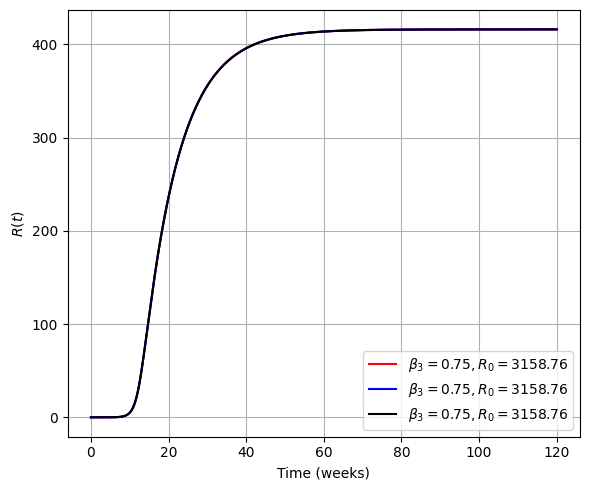

In [66]:
## beta3

import numpy as np
from scipy.integrate import odeint
from scipy.linalg import eig
import matplotlib.pyplot as plt
import pandas as pd



#generate a subfolder for the plots
#import os
#os.makedirs('Fig_beta3')



# Population
#N = 47060.97
N = 10000
Tend = 120

# Initial guess parameters
guess_params = np.zeros(17)
guess_params[0] = 0.93      # Increase delta to speed up progression to I
guess_params[1]  = 0.000000190     # beta
guess_params[2]  = 0.0000000245     # beta_1
guess_params[3]  = 0.000000065      # beta_2
guess_params[4]  = 0.0000000650     # beta_3
guess_params[5] =  0.000620       # beta_p
guess_params[6] =  0.00055          # gamma
guess_params[7]  = 0.00990          # gamma_1    # very sensitive
guess_params[8]  = 0.006          # sigma
guess_params[10] = 0.000010      # d_1
guess_params[11] = 0.750        # eta
guess_params[12] = 0.88000      # xi
guess_params[13] = 0.1000       # d change sensitive
guess_params[15] = 0.010        # eta_1
guess_params[16] = 0.50000      # alpha
guess_params[9] = 0.65 * guess_params[10]      # b_1 = 0.9*d_1
guess_params[14] = 0.95 * guess_params[13]      # b = 1.1*d

delta = guess_params[0]
gamma = guess_params[6]
gamma_1 = guess_params[7]
eta   = guess_params[11]
xi    = guess_params[12]


#lexp = 65.25
#lexp = 60.1
#mu = 1./(52*lexp)/100
#mu = 0.0000045
mu = 0.099
Delta = N * mu
a1 = delta + mu
a2 = gamma + gamma_1 + mu
a3 = eta + xi + mu
phi_p = 0.00

print('Delta =', Delta)

# Define the system of differential equations
def ebola_model(y, t, params):
    S, E, I, H, R, D, B, P = y

    # 0      1     2       3       4       5       6       7        8    9   10   11   12  13 14  15     16
    delta, beta, beta_1, beta_2, beta_3, beta_p, gamma, gamma_1, sigma, b_1, d_1, eta, xi, d, b, eta_1, alpha = params

    Psi = beta * I + beta_1 * H + beta_2 * D + beta_3 * B + beta_p * P
    dSdt =  Delta - (Psi + mu) * S
    dEdt = Psi * S - a1 * E
    dIdt = delta * E - a2 * I
    dHdt = gamma_1 * I - a3 * H
    dRdt = xi * H -  mu * R
    dDdt = gamma * I + eta * H - d * D
    dBdt = d * D - b * B
    dPdt = phi_p + sigma * I + eta_1 * H + d_1 * D + b_1 * B - alpha * P

    return [dSdt, dEdt, dIdt, dHdt, dRdt, dDdt, dBdt, dPdt]

# Function to calculate R0
def ebola_R0(params):
    delta, beta, beta_1, beta_2, beta_3, beta_p, gamma, gamma_1, sigma, b_1, d_1, eta, xi, d, b, eta_1, alpha = params

    a1 = delta + mu
    a2 = gamma + gamma_1 + mu
    a3 = eta + xi + mu

    R0 = ( beta + beta_2 * gamma / d + beta_3 * gamma / b + beta_p * sigma / alpha + beta_p * gamma / alpha * (d_1 / d + b_1 / b) ) * Delta * delta / (mu * a1 * a2) + \
         ( beta_1 + beta_2 * eta / d + beta_3 * eta / b + beta_p * eta_1 / alpha + beta_p * eta / alpha * (d_1 / d + b_1 / b) ) * Delta * delta * gamma_1 / (mu * a1 * a2 * a3)

    return R0

# Simulation parameters
beta3s = [0.000000000650 , 0.5 , 0.75 ]
styles = ['r-', 'b-', 'k-']
tt = np.linspace(0., Tend, 35001)

# Initial conditions
S0 = 0.9999 * N
E0 = N - S0
I0 = 0.
y0 = np.array([S0, E0, I0, 0.0000 * N, 0.0000 * N, 0.00000 * N, 0.00000 * N, 0.])


# plot: I
plt.figure(figsize=(6, 5))
for beta_3, style in zip(beta3s, styles):
    guess_params[4] = beta_3
    R0 = ebola_R0(guess_params)
    sol = odeint(ebola_model, y0, tt, args=(guess_params,))
    plt.plot(tt, sol[:, 2], style, label=f'$\\beta_3={beta_3}, R_0={R0:.2f}$')
plt.xlabel('Time (weeks)')
plt.ylabel('$I(t)$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('Fig_beta3/I.pdf',bbox_inches='tight')
plt.show()



# plot: H
plt.figure(figsize=(6, 5))
for beta_2, style in zip(beta3s, styles):
    guess_params[4] = beta_3
    R0 = ebola_R0(guess_params)
    sol = odeint(ebola_model, y0, tt, args=(guess_params,))
    plt.plot(tt, sol[:, 3], style, label=f'$\\beta_3={beta_3}, R_0={R0:.2f}$')
plt.xlabel('Time (weeks)')
plt.ylabel('$H(t)$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('Fig_beta3/H.pdf',bbox_inches='tight')
plt.show()


# plot: D
plt.figure(figsize=(6, 5))
for beta_2, style in zip(beta3s, styles):
    guess_params[4] = beta_3
    R0 = ebola_R0(guess_params)
    sol = odeint(ebola_model, y0, tt, args=(guess_params,))
    plt.plot(tt, sol[:, 5], style, label=f'$\\beta_3={beta_3}, R_0={R0:.2f}$')
plt.xlabel('Time (weeks)')
plt.ylabel('$D(t)$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('Fig_beta3/D.pdf',bbox_inches='tight')
plt.show()

# plot: B
plt.figure(figsize=(6, 5))
for beta_2, style in zip(beta3s, styles):
    guess_params[4] = beta_3
    R0 = ebola_R0(guess_params)
    sol = odeint(ebola_model, y0, tt, args=(guess_params,))
    plt.plot(tt, sol[:, 6], style, label=f'$\\beta_3={beta_3}, R_0={R0:.2f}$')
plt.xlabel('Time (weeks)')
plt.ylabel('$B(t)$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('Fig_beta3/B.pdf',bbox_inches='tight')
plt.show()


# plot: R
plt.figure(figsize=(6, 5))
for beta_2, style in zip(beta3s, styles):
    guess_params[4] = beta_3
    R0 = ebola_R0(guess_params)
    sol = odeint(ebola_model, y0, tt, args=(guess_params,))
    plt.plot(tt, sol[:, 4], style, label=f'$\\beta_3={beta_3}, R_0={R0:.2f}$')
plt.xlabel('Time (weeks)')
plt.ylabel('$R(t)$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('Fig_beta3/R.pdf',bbox_inches='tight')
plt.show()

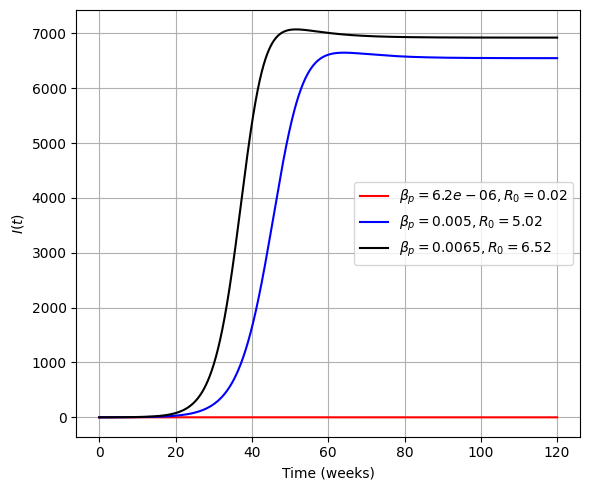

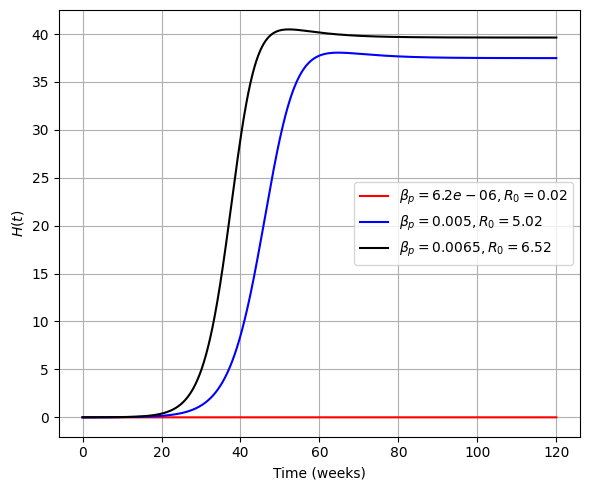

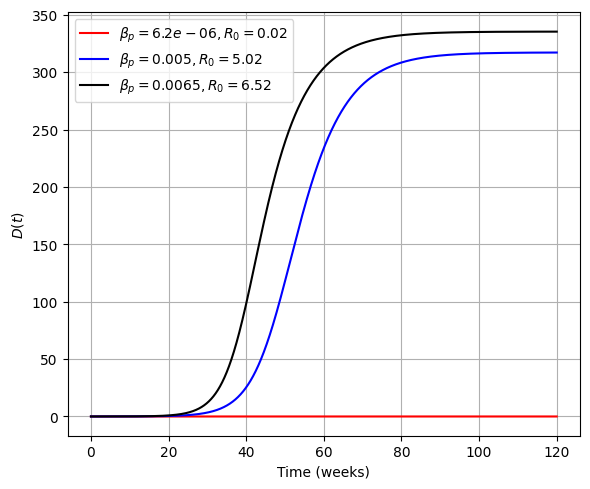

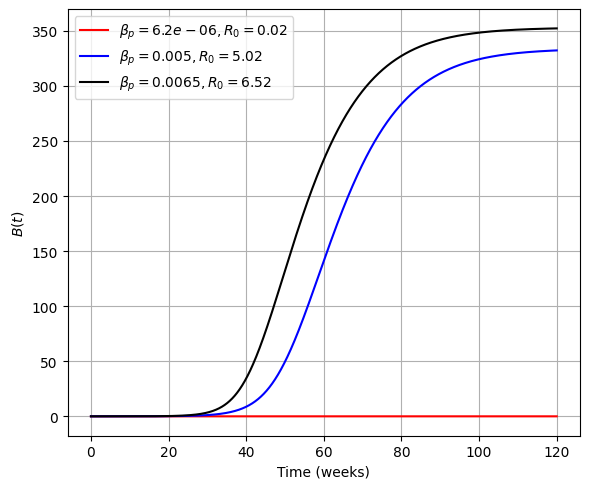

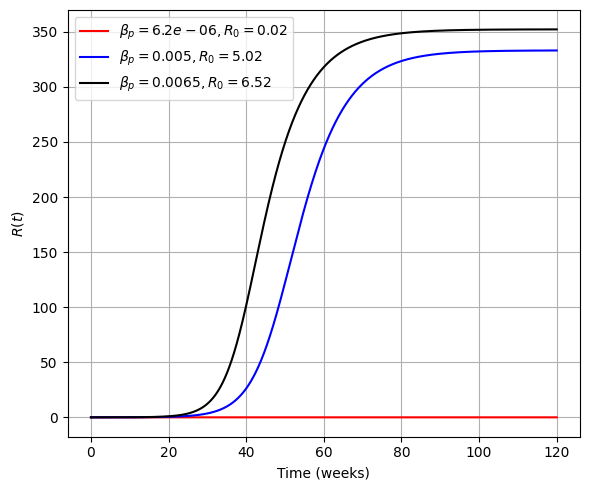

In [71]:
## betap

import numpy as np
from scipy.integrate import odeint
from scipy.linalg import eig
import matplotlib.pyplot as plt
import pandas as pd



#generate a subfolder for the plots
#import os
#os.makedirs('Fig_betap')


# Population
#N = 47060.97
N = 10000
Tend = 120

# Initial guess parameters
guess_params = np.zeros(17)
guess_params[0] = 0.93      # Increase delta to speed up progression to I
guess_params[1]  = 0.000000190     # beta
guess_params[2]  = 0.0000000245     # beta_1
guess_params[3]  = 0.000000065      # beta_2
guess_params[4]  = 0.0000000650     # beta_3
guess_params[5] =  0.000620       # beta_p
guess_params[6] =  0.00055          # gamma
guess_params[7]  = 0.00990          # gamma_1    # very sensitive
guess_params[8]  = 0.006          # sigma
guess_params[10] = 0.000010      # d_1
guess_params[11] = 0.750        # eta
guess_params[12] = 0.88000      # xi
guess_params[13] = 0.1000       # d change sensitive
guess_params[15] = 0.010        # eta_1
guess_params[16] = 0.50000      # alpha
guess_params[9] = 0.65 * guess_params[10]      # b_1 = 0.9*d_1
guess_params[14] = 0.95 * guess_params[13]      # b = 1.1*d

delta = guess_params[0]
gamma = guess_params[6]
gamma_1 = guess_params[7]
eta   = guess_params[11]
xi    = guess_params[12]


#lexp = 65.25
#lexp = 60.1
#mu = 1./(52*lexp)/100
#mu = 0.0000045
mu = 0.099
Delta = N * mu
a1 = delta + mu
a2 = gamma + gamma_1 + mu
a3 = eta + xi + mu
phi_p = 0.00

# Define the system of differential equations
def ebola_model(y, t, params):
    S, E, I, H, R, D, B, P = y

    # 0      1     2       3       4       5       6       7        8    9   10   11   12  13 14  15     16
    delta, beta, beta_1, beta_2, beta_3, beta_p, gamma, gamma_1, sigma, b_1, d_1, eta, xi, d, b, eta_1, alpha = params

    Psi = beta * I + beta_1 * H + beta_2 * D + beta_3 * B + beta_p * P
    dSdt =  Delta - (Psi + mu) * S
    dEdt = Psi * S - a1 * E
    dIdt = delta * E - a2 * I
    dHdt = gamma_1 * I - a3 * H
    dRdt = xi * H -  mu * R
    dDdt = gamma * I + eta * H - d * D
    dBdt = d * D - b * B
    dPdt = phi_p + sigma * I + eta_1 * H + d_1 * D + b_1 * B - alpha * P

    return [dSdt, dEdt, dIdt, dHdt, dRdt, dDdt, dBdt, dPdt]

# Function to calculate R0
def ebola_R0(params):
    delta, beta, beta_1, beta_2, beta_3, beta_p, gamma, gamma_1, sigma, b_1, d_1, eta, xi, d, b, eta_1, alpha = params

    a1 = delta + mu
    a2 = gamma + gamma_1 + mu
    a3 = eta + xi + mu

    R0 = ( beta + beta_2 * gamma / d + beta_3 * gamma / b + beta_p * sigma / alpha + beta_p * gamma / alpha * (d_1 / d + b_1 / b) ) * Delta * delta / (mu * a1 * a2) + \
         ( beta_1 + beta_2 * eta / d + beta_3 * eta / b + beta_p * eta_1 / alpha + beta_p * eta / alpha * (d_1 / d + b_1 / b) ) * Delta * delta * gamma_1 / (mu * a1 * a2 * a3)

    return R0

# Simulation parameters
betaps = [0.00000620 , 0.005 , 0.0065 ]

styles = ['r-', 'b-', 'k-']
tt = np.linspace(0., Tend, 35001)

# Initial conditions
S0 = 0.9999 * N
E0 = N - S0
I0 = 0.
y0 = np.array([S0, E0, I0, 0.0000 * N, 0.0000 * N, 0.00000 * N, 0.00000 * N, 0.])


# plot: I
plt.figure(figsize=(6, 5))
for beta_p, style in zip(betaps, styles):
    guess_params[5] = beta_p
    R0 = ebola_R0(guess_params)
    sol = odeint(ebola_model, y0, tt, args=(guess_params,))
    plt.plot(tt, sol[:, 2], style, label=f'$\\beta_p={beta_p}, R_0={R0:.2f}$')
plt.xlabel('Time (weeks)')
plt.ylabel('$I(t)$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('Fig_betap/I.pdf',bbox_inches='tight')
plt.show()



# plot: H
plt.figure(figsize=(6, 5))
for beta_p, style in zip(betaps, styles):
    guess_params[5] = beta_p
    R0 = ebola_R0(guess_params)
    sol = odeint(ebola_model, y0, tt, args=(guess_params,))
    plt.plot(tt, sol[:, 3], style, label=f'$\\beta_p={beta_p}, R_0={R0:.2f}$')
plt.xlabel('Time (weeks)')
plt.ylabel('$H(t)$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('Fig_betap/H.pdf',bbox_inches='tight')
plt.show()


# plot: D
plt.figure(figsize=(6, 5))
for beta_p, style in zip(betaps, styles):
    guess_params[5] = beta_p
    R0 = ebola_R0(guess_params)
    sol = odeint(ebola_model, y0, tt, args=(guess_params,))
    plt.plot(tt, sol[:, 5], style, label=f'$\\beta_p={beta_p}, R_0={R0:.2f}$')
plt.xlabel('Time (weeks)')
plt.ylabel('$D(t)$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('Fig_betap/D.pdf',bbox_inches='tight')
plt.show()

# plot: B
plt.figure(figsize=(6, 5))
for beta_p, style in zip(betaps, styles):
    guess_params[5] = beta_p
    R0 = ebola_R0(guess_params)
    sol = odeint(ebola_model, y0, tt, args=(guess_params,))
    plt.plot(tt, sol[:, 6], style, label=f'$\\beta_p={beta_p}, R_0={R0:.2f}$')
plt.xlabel('Time (weeks)')
plt.ylabel('$B(t)$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('Fig_betap/B.pdf',bbox_inches='tight')
plt.show()


# plot: R
plt.figure(figsize=(6, 5))
for beta_p, style in zip(betaps, styles):
    guess_params[5] = beta_p
    R0 = ebola_R0(guess_params)
    sol = odeint(ebola_model, y0, tt, args=(guess_params,))
    plt.plot(tt, sol[:, 4], style, label=f'$\\beta_p={beta_p}, R_0={R0:.2f}$')
plt.xlabel('Time (weeks)')
plt.ylabel('$R(t)$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('Fig_betap/R.pdf',bbox_inches='tight')
plt.show()

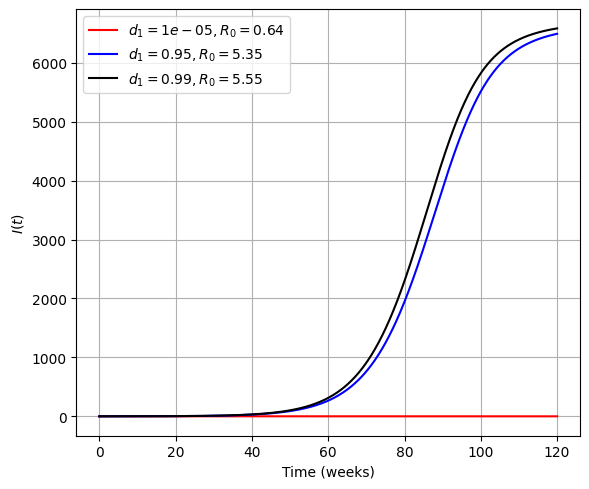

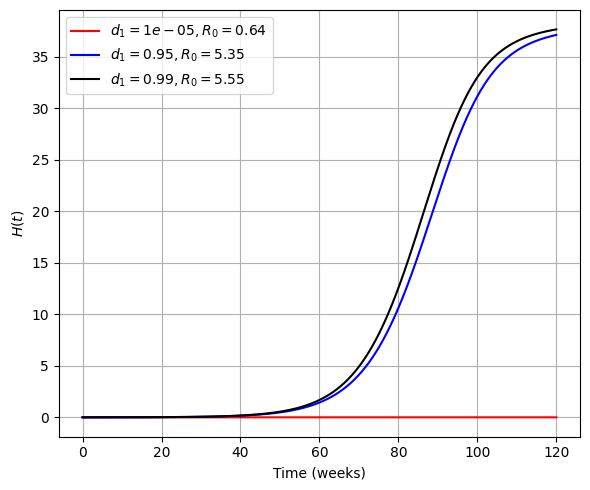

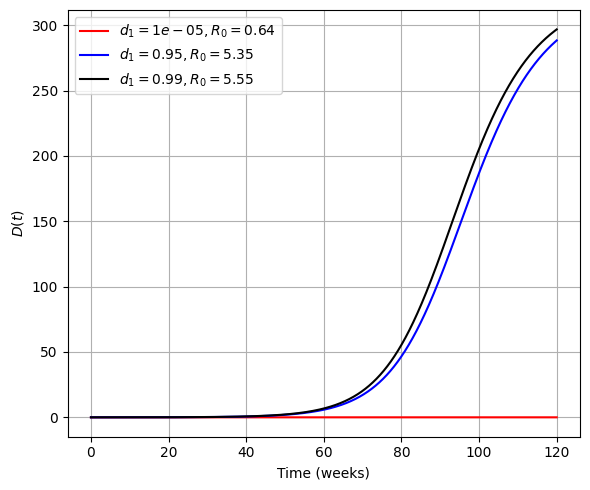

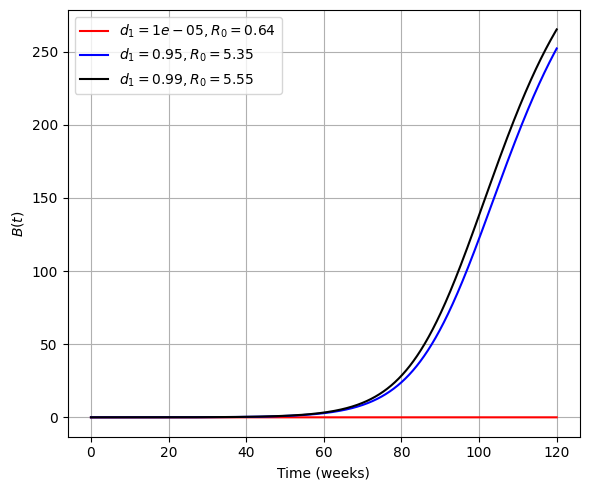

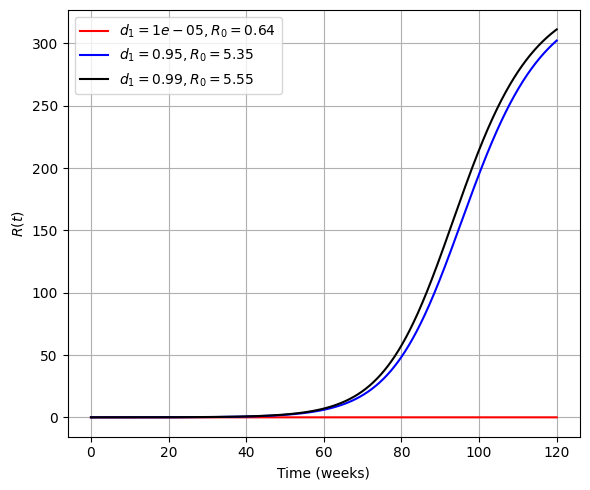

In [75]:
## d1

import numpy as np
from scipy.integrate import odeint
from scipy.linalg import eig
import matplotlib.pyplot as plt
import pandas as pd



#generate a subfolder for the plots
#import os
#os.makedirs('Fig_d1')


# Population
#N = 47060.97
N = 10000
Tend = 120

# Initial guess parameters
guess_params = np.zeros(17)
guess_params[0] = 0.93      # Increase delta to speed up progression to I
guess_params[1]  = 0.000000190     # beta
guess_params[2]  = 0.0000000245     # beta_1
guess_params[3]  = 0.000000065      # beta_2
guess_params[4]  = 0.0000000650     # beta_3
guess_params[5] =  0.000620       # beta_p
guess_params[6] =  0.00055          # gamma
guess_params[7]  = 0.00990          # gamma_1    # very sensitive
guess_params[8]  = 0.006          # sigma
guess_params[10] = 0.000010      # d_1
guess_params[11] = 0.750        # eta
guess_params[12] = 0.88000      # xi
guess_params[13] = 0.1000       # d change sensitive
guess_params[15] = 0.010        # eta_1
guess_params[16] = 0.50000      # alpha
guess_params[9] = 0.65 * guess_params[10]      # b_1 = 0.9*d_1
guess_params[14] = 0.95 * guess_params[13]      # b = 1.1*d

delta = guess_params[0]
gamma = guess_params[6]
gamma_1 = guess_params[7]
eta   = guess_params[11]
xi    = guess_params[12]


#lexp = 65.25
#lexp = 60.1
#mu = 1./(52*lexp)/100
#mu = 0.0000045
mu = 0.099
Delta = N * mu
a1 = delta + mu
a2 = gamma + gamma_1 + mu
a3 = eta + xi + mu
phi_p = 0.00

# Define the system of differential equations
def ebola_model(y, t, params):
    S, E, I, H, R, D, B, P = y

    # 0      1     2       3       4       5       6       7        8    9   10   11   12  13 14  15     16
    delta, beta, beta_1, beta_2, beta_3, beta_p, gamma, gamma_1, sigma, b_1, d_1, eta, xi, d, b, eta_1, alpha = params

    Psi = beta * I + beta_1 * H + beta_2 * D + beta_3 * B + beta_p * P
    dSdt =  Delta - (Psi + mu) * S
    dEdt = Psi * S - a1 * E
    dIdt = delta * E - a2 * I
    dHdt = gamma_1 * I - a3 * H
    dRdt = xi * H -  mu * R
    dDdt = gamma * I + eta * H - d * D
    dBdt = d * D - b * B
    dPdt = phi_p + sigma * I + eta_1 * H + d_1 * D + b_1 * B - alpha * P

    return [dSdt, dEdt, dIdt, dHdt, dRdt, dDdt, dBdt, dPdt]

# Function to calculate R0
def ebola_R0(params):
    delta, beta, beta_1, beta_2, beta_3, beta_p, gamma, gamma_1, sigma, b_1, d_1, eta, xi, d, b, eta_1, alpha = params

    a1 = delta + mu
    a2 = gamma + gamma_1 + mu
    a3 = eta + xi + mu

    R0 = ( beta + beta_2 * gamma / d + beta_3 * gamma / b + beta_p * sigma / alpha + beta_p * gamma / alpha * (d_1 / d + b_1 / b) ) * Delta * delta / (mu * a1 * a2) + \
         ( beta_1 + beta_2 * eta / d + beta_3 * eta / b + beta_p * eta_1 / alpha + beta_p * eta / alpha * (d_1 / d + b_1 / b) ) * Delta * delta * gamma_1 / (mu * a1 * a2 * a3)

    return R0

# Simulation parameters
d1s = [0.000010 , 0.95 , 0.99 ]

styles = ['r-', 'b-', 'k-']
tt = np.linspace(0., Tend, 35001)

# Initial conditions
S0 = 0.9999 * N
E0 = N - S0
I0 = 0.
y0 = np.array([S0, E0, I0, 0.0000 * N, 0.0000 * N, 0.00000 * N, 0.00000 * N, 0.])


# plot: I
plt.figure(figsize=(6, 5))
for d_1, style in zip(d1s, styles):
    guess_params[10] = d_1
    R0 = ebola_R0(guess_params)
    sol = odeint(ebola_model, y0, tt, args=(guess_params,))
    plt.plot(tt, sol[:, 2], style, label=f'$d_1={d_1}, R_0={R0:.2f}$')
plt.xlabel('Time (weeks)')
plt.ylabel('$I(t)$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('Fig_d1/I.pdf',bbox_inches='tight')
plt.show()



# plot: H
plt.figure(figsize=(6, 5))
for d_1, style in zip(d1s, styles):
    guess_params[10] = d_1
    R0 = ebola_R0(guess_params)
    sol = odeint(ebola_model, y0, tt, args=(guess_params,))
    plt.plot(tt, sol[:, 3], style, label=f'$d_1={d_1}, R_0={R0:.2f}$')
plt.xlabel('Time (weeks)')
plt.ylabel('$H(t)$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('Fig_d1/H.pdf',bbox_inches='tight')
plt.show()


# plot: D
plt.figure(figsize=(6, 5))
for d_1, style in zip(d1s, styles):
    guess_params[10] = d_1
    R0 = ebola_R0(guess_params)
    sol = odeint(ebola_model, y0, tt, args=(guess_params,))
    plt.plot(tt, sol[:, 5], style, label=f'$d_1={d_1}, R_0={R0:.2f}$')
plt.xlabel('Time (weeks)')
plt.ylabel('$D(t)$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('Fig_d1/D.pdf',bbox_inches='tight')
plt.show()

# plot: B
plt.figure(figsize=(6, 5))
for d_1, style in zip(d1s, styles):
    guess_params[10] = d_1
    R0 = ebola_R0(guess_params)
    sol = odeint(ebola_model, y0, tt, args=(guess_params,))
    plt.plot(tt, sol[:, 6], style, label=f'$d_1={d_1}, R_0={R0:.2f}$')
plt.xlabel('Time (weeks)')
plt.ylabel('$B(t)$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('Fig_d1/B.pdf',bbox_inches='tight')
plt.show()


# plot: R
plt.figure(figsize=(6, 5))
for d_1, style in zip(d1s, styles):
    guess_params[10] = d_1
    R0 = ebola_R0(guess_params)
    sol = odeint(ebola_model, y0, tt, args=(guess_params,))
    plt.plot(tt, sol[:, 4], style, label=f'$d_1={d_1}, R_0={R0:.2f}$')
plt.xlabel('Time (weeks)')
plt.ylabel('$R(t)$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('Fig_d1/R.pdf',bbox_inches='tight')
plt.show()